In [363]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import uncrater as uc
from uncrater.utils import cordic2rad, rad2cordic, cordic_add
alpha_to_pdrift = 50e3*4096*16/102.4e6*2*np.pi*1e-6

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [364]:
import json
def read_adc(ch):
    jdata = json.load(open(f'/u/home/anze/Nov21/adc{ch}_output.json'))
    data = np.array(jdata['data'])
    data[data>8192]-=16384
    return data

ewf = [read_adc(ch+1) for ch in range(4)]

def spec(w):
    return np.abs(np.fft.rfft(w)**2)

In [441]:
C = uc.Collection("session_calibrator/cdi_output")
Cd = uc.Collection("session_calibrator/cdi_output")
#C.calib_data.shape

Analyzing 30 files from session_calibrator/cdi_output.
Analyzing 30 files from session_calibrator/cdi_output.


In [432]:
C.calib[0]['meta'].snroff

1

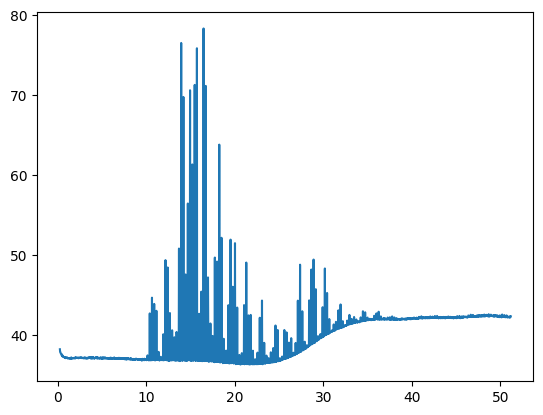

In [433]:
plt.plot(C.spectra[0][0].frequency[10:],np.sqrt(C.spectra[3][0].data[10:]))
#plt.xlim(40,50)
#plt.ylim(41,43)
#plt.semilogy()

In [434]:
C.calib_data[2,1:,:].mean(axis=0)

array([1.27000000e+02+0.j, 0.00000000e+00+0.j, 2.71542667e+05+0.j,
       1.34094333e+05+0.j, 1.28839333e+05+0.j, 1.17799778e+05+0.j,
       1.14653667e+05+0.j, 1.24424333e+05+0.j, 1.24000000e+05+0.j,
       1.17013667e+05+0.j, 1.13192333e+05+0.j, 9.30262222e+04+0.j,
       9.15347778e+04+0.j, 1.01538222e+05+0.j, 1.01699889e+05+0.j,
       1.04739667e+05+0.j, 1.11107889e+05+0.j, 1.16344333e+05+0.j,
       1.16219222e+05+0.j, 1.26554778e+05+0.j, 1.16093222e+05+0.j,
       1.01661556e+05+0.j, 1.07926778e+05+0.j, 1.09352778e+05+0.j,
       1.14397556e+05+0.j, 1.14103778e+05+0.j, 1.14945444e+05+0.j,
       1.16359000e+05+0.j, 1.24028222e+05+0.j, 1.12096889e+05+0.j,
       1.04653778e+05+0.j, 1.05647444e+05+0.j, 1.05809778e+05+0.j,
       1.00985222e+05+0.j, 9.98711111e+04+0.j, 1.03598667e+05+0.j,
       1.07078333e+05+0.j, 1.03532222e+05+0.j, 1.01639000e+05+0.j,
       9.91476667e+04+0.j, 9.20425556e+04+0.j, 1.02314444e+05+0.j,
       1.06623222e+05+0.j, 1.10173111e+05+0.j, 1.11120667e+05+

[]

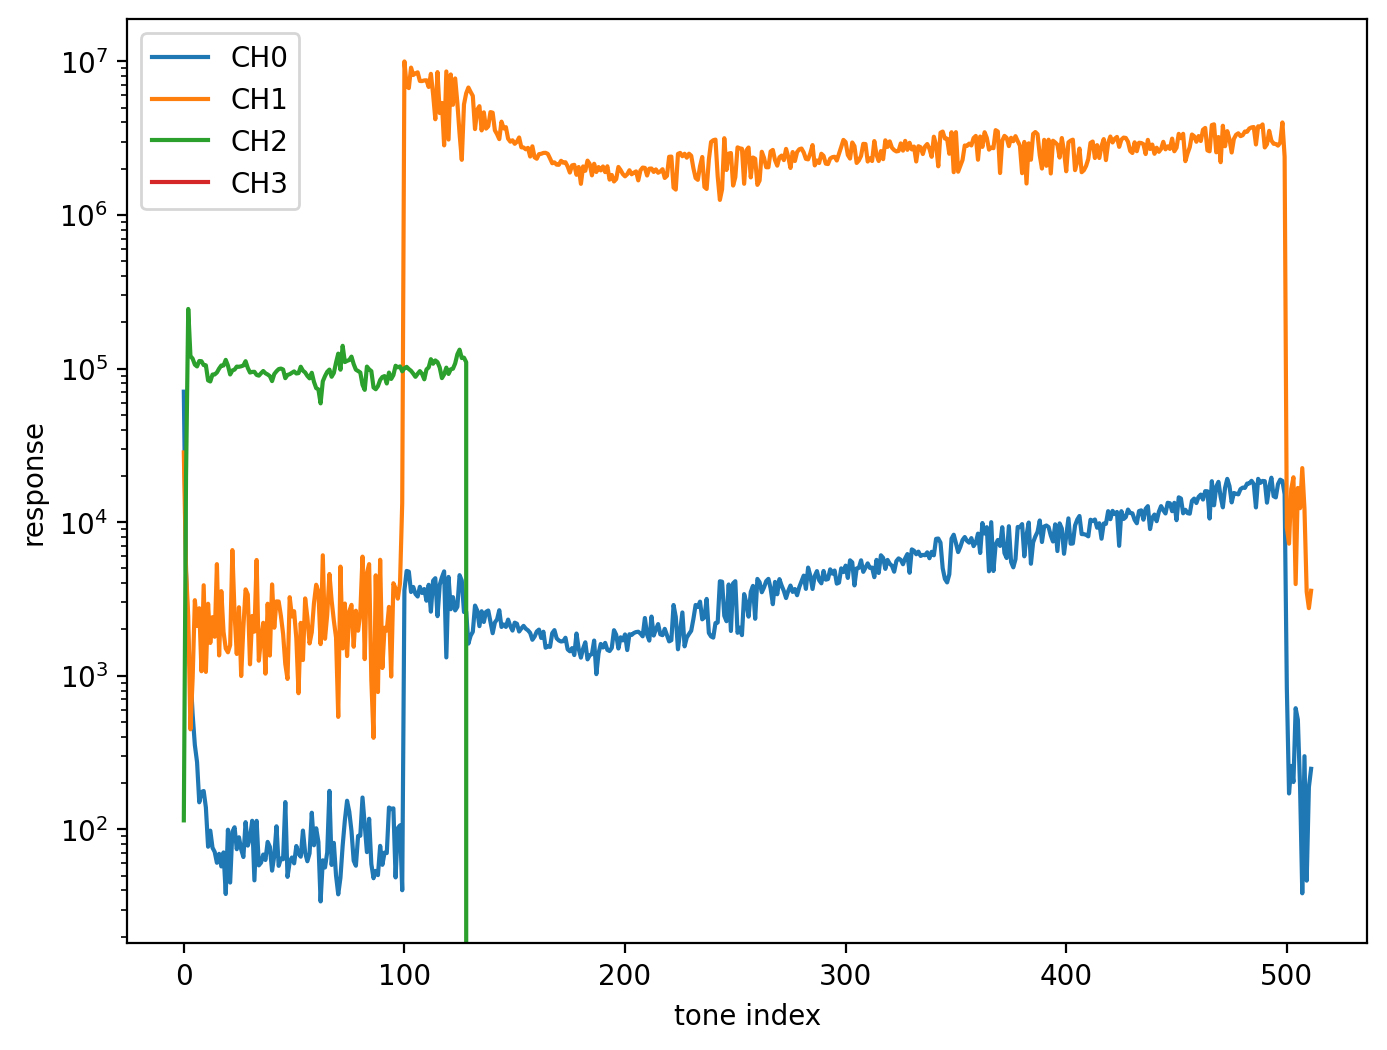

In [436]:
plt.figure(figsize=(8,6),dpi=200)
for ch in range(4):
    plt.plot(np.abs(C.calib_data[ch,0:,:]**1).mean(axis=0), label='CH'+str(ch))

plt.legend()
plt.xlabel('tone index')
plt.ylabel('response')
#i1= np.real(C.calib_data[2,:,400])
#i2=np.imag(C.calib_data[2,:,400])
#i3= np.real(C.calib_data[3,:,400])
#plt.plot(np.imag(C.calib_data[3,:,100]))
#plt.plot(C.calib_data[0,:,400])
#plt.plot(r3**2+i3**2)
plt.semilogy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

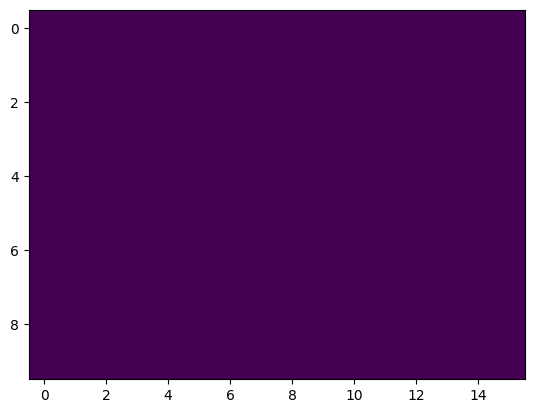

In [ ]:
#C.gNacc
plt.imshow(cordic2rad(C.gphase[:,:16]),aspect='auto', interpolation='nearest')
#plt.plot(C.gphase[30,:16])
#plt.plot(C.gphase[60,:16])

#plt.plot(C.calib_data[0,1,:])
#plt.plot(C.calib_data[0,60,:])


/tmp/ipykernel_1670210/3854325687.py:1: RuntimeWarning: Mean of empty slice.
  plt.plot(cordic2rad(C.gphase[10:60,:17].mean(axis=0).astype(int))/alpha_to_pdrift/32)
/tmp/ipykernel_1670210/3854325687.py:1: RuntimeWarning: invalid value encountered in cast
  plt.plot(cordic2rad(C.gphase[10:60,:17].mean(axis=0).astype(int))/alpha_to_pdrift/32)
/tmp/ipykernel_1670210/3854325687.py:2: RuntimeWarning: Mean of empty slice.
  plt.plot(cordic2rad(C.gphase[-30:-10,:17].mean(axis=0).astype(int))/alpha_to_pdrift/32)
/tmp/ipykernel_1670210/3854325687.py:2: RuntimeWarning: invalid value encountered in cast
  plt.plot(cordic2rad(C.gphase[-30:-10,:17].mean(axis=0).astype(int))/alpha_to_pdrift/32)


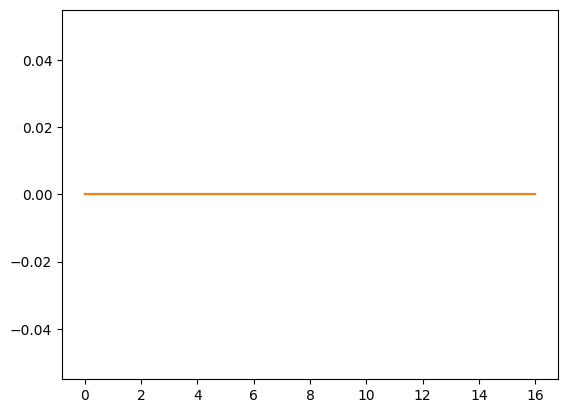

In [438]:
plt.plot(cordic2rad(C.gphase[10:60,:17].mean(axis=0).astype(int))/alpha_to_pdrift/32)
plt.plot(cordic2rad(C.gphase[-30:-10,:17].mean(axis=0).astype(int))/alpha_to_pdrift/32)
#plt.plot(C.gphase[-2,1:18])
#plt.plot(C.cd_fd0/C.cd_sd0)
#plt.plot(C.cd_fd1/C.cd_sd1)
#plt.plot(C.cd_fd2/C.cd_sd2)
#plt.plot(C.cd_fd3/C.cd_sd3)

#plt.plot(C.cd_fdx/C.cd_sdx)
#plt.xlim(2500,3500)
#plt.ylim(-1e-4,1e-4)

#plt
# .plot(C.cd_fdx)
#plt.xlim(3000,4000)
#plt.semilogy()


#plt.semilogy()
#C.cd_lock_ant.max()

(0.0, 80.0)

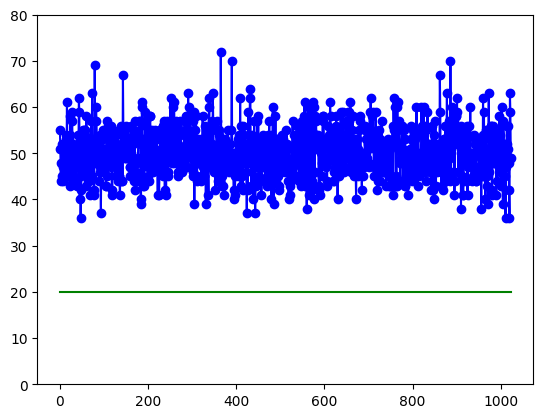

In [442]:
plt.plot(Cd.cd_snr0,'bo-')
plt.plot(Cd.cd_have_lock*20,'g-')
plt.ylim(0,80)

(-0.0001, 0.0001)

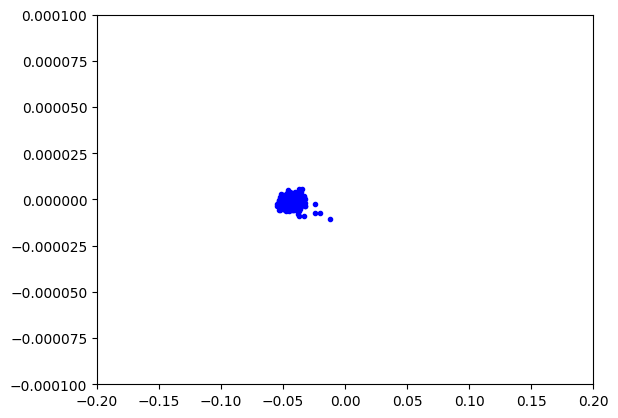

In [443]:
plt.plot(Cd.cd_drift/alpha_to_pdrift,Cd.cd_fd0/Cd.cd_sd0,'b.')   
plt.xlim(-0.2,0.2)
plt.ylim(-1e-4,1e-4)
#plt.plot(Cd.cd_drift,Cd.cd_snr0)#Cd.cd_sd0,'bo')
#plt
# .xlim(-1e-4,1e-4)
#plt.ylim(-1e-2,1e-2)

Text(0, 0.5, 'drift [ppm]')

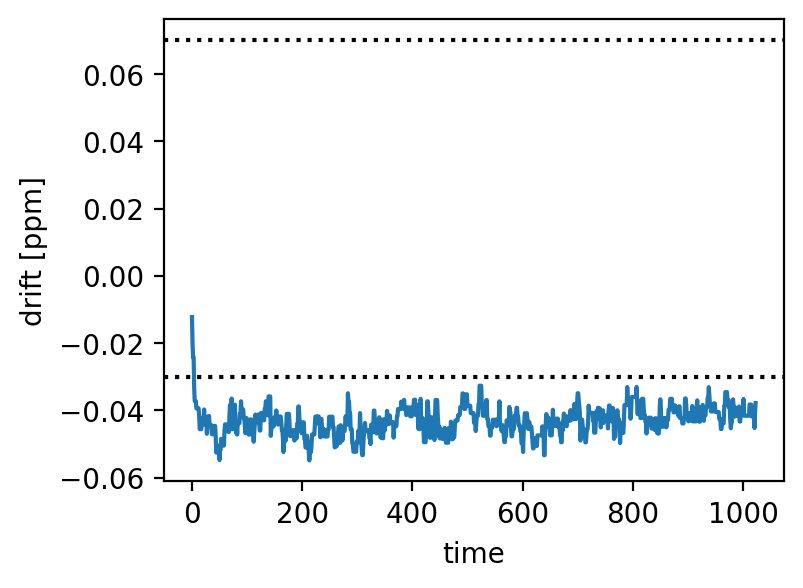

In [444]:

plt.figure(figsize=(4,3),dpi=200)
plt.plot((Cd.cd_drift[0:]/alpha_to_pdrift))
ofs = -0.03
plt.axhline(ofs,ls=':', color='k')
plt.axhline(ofs+0.1, ls=':', color='k')
plt.xlabel('time')
plt.ylabel('drift [ppm]')
#plt.plot(C.cd_snr0)
#plt.semilogy()
##plt.ylim(-1e-5,1e-5)


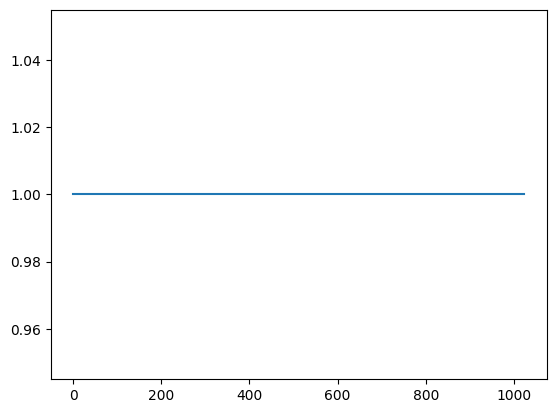

In [445]:
plt.plot(Cd.cd_have_lock)

In [261]:
P=C.calib[1]['meta']
P.process_err_cnt


0xD6B/0x80000000*np.pi/alpha_to_pdrift*2,to_rad(0xD6B)/alpha_to_pdrift*2


NameError: name 'to_rad' is not defined

In [262]:
0xD6B/(1<<30)*np.pi/alpha_to_pdrift, to_rad(0xD6B)/alpha_to_pdrift

NameError: name 'to_rad' is not defined

In [252]:
cordic2rad(cordic_add(rad2cordic(np.pi/3),rad2cordic(np.pi)))/np.pi

-0.6666666669771075

In [253]:
cx =np.hstack([c['pfb'][1] for c in C.calib[:-1]])
#plt.plot(np.abs(np.fft.fft(cx)**2))
plt.plot(np.angle(cx))
#plt.xlim(28500,28900)
#plt.xlim(0,200)
#plt.xlim(180e3,185e3)

AttributeError: 'int' object has no attribute 'arctan2'

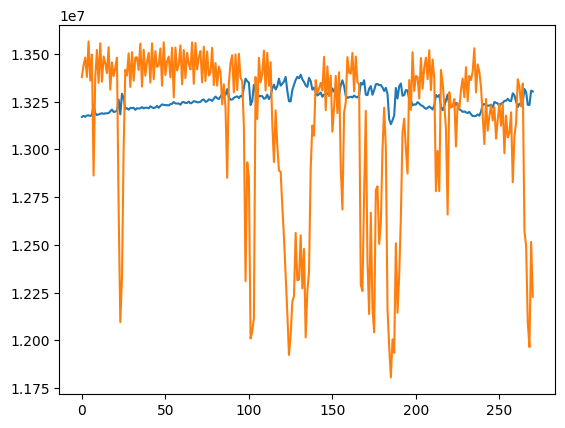

In [458]:
plt.plot(a[1:,105])
plt.plot(a[1:,405]*3.25)

Text(0, 0.5, 'time')

<Figure size 1600x1200 with 0 Axes>

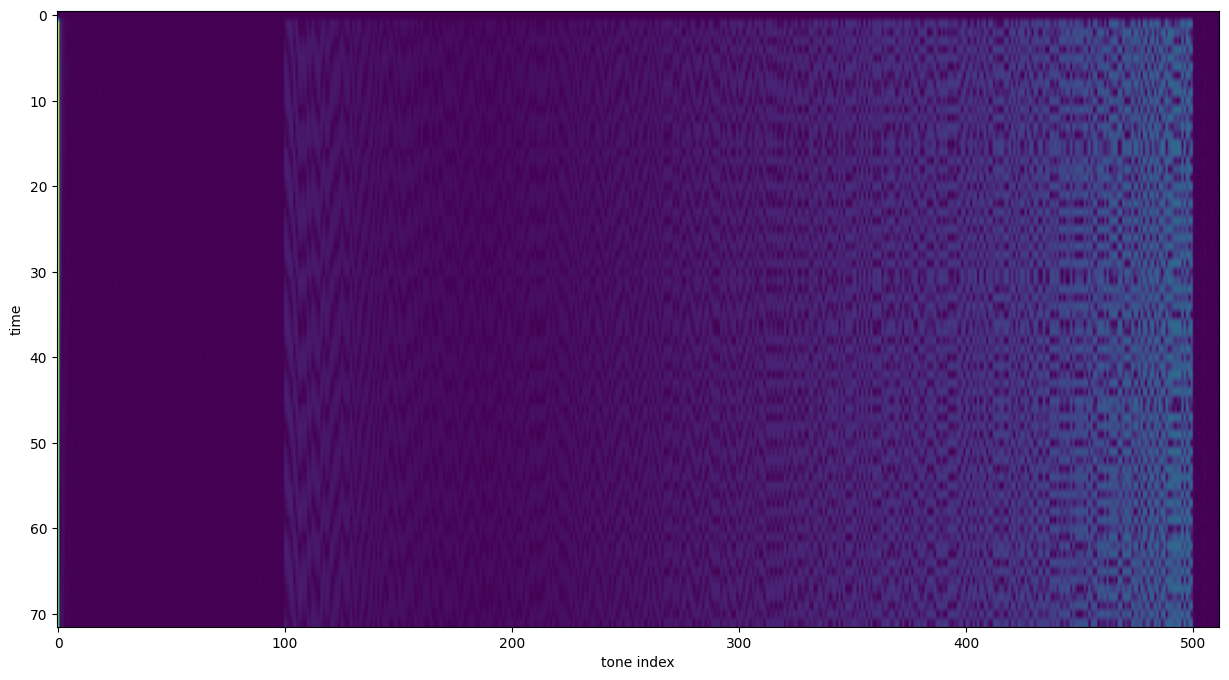

In [416]:
plt.figure(figsize=(8,6),dpi=200)
a = np.abs(C.calib_data[0])
plt.figure(figsize=(15,8))
plt.imshow(a,aspect='auto')
plt.xlabel('tone index')
plt.ylabel('time')
#plt.plot(a[:,100])

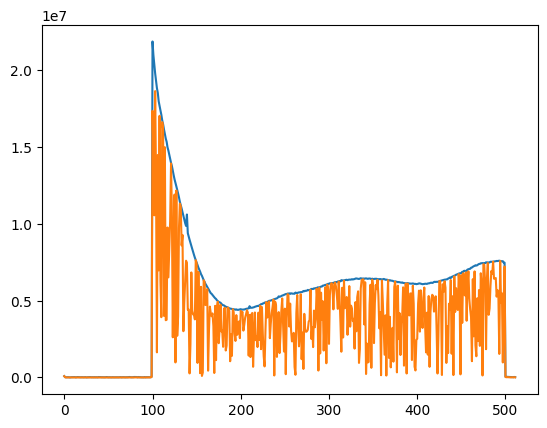

In [309]:
plt.plot(np.max(np.abs(C.calib_data[0]),axis=0))
plt.plot(np.abs(C.calib_data[0,1,:]))

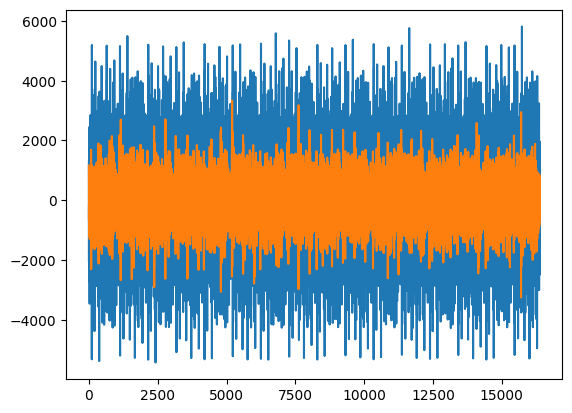

In [39]:
w=[w.waveform for w in C.waveform_packets]
plt.plot(ewf[0])
plt.plot(w[0])


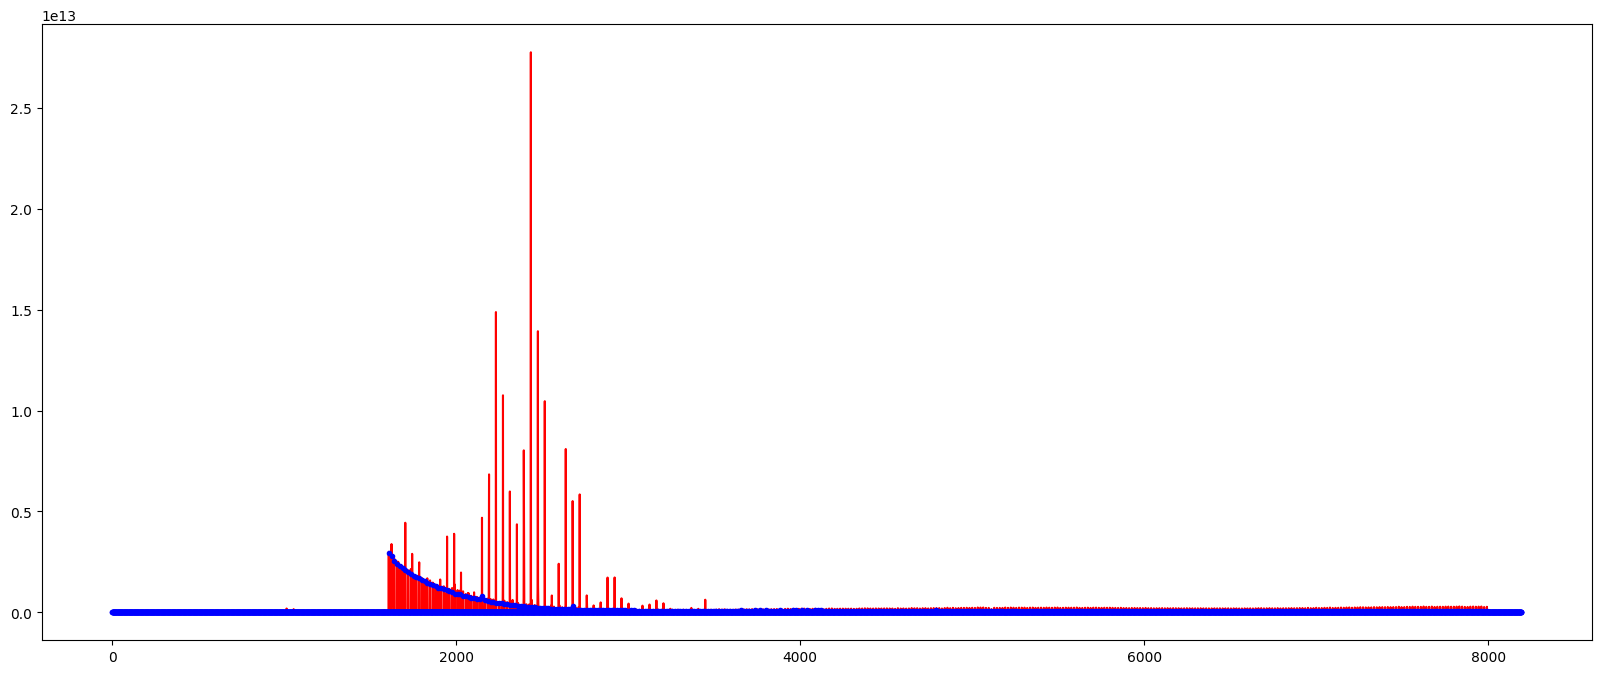

In [58]:
plt.figure(figsize=(20,8))

plt.plot(spec(w[3])*3,'r-')
plt.plot(spec(ewf[3]),'b.')
#plt.xlim(2000,2200)
#plt.semilogy()

In [13]:
for i,v in enumerate(P.registers):
    if (v!=0):
        print (f"Register {i:x}: {v}")

Register 1a: 35755457
Register 3c: 1
Register 4d: 1
Register 50: 128
Register 51: 128
Register 52: 128
Register 53: 128
Register 54: 128
Register 55: 128
Register 56: 128
Register 57: 128
Register 58: 128
Register 59: 128
Register 5a: 128
Register 5b: 128
Register 5c: 128
Register 5d: 128
Register 5e: 128
Register 5f: 128
Register 60: 128
Register 61: 128
Register 62: 128
Register 63: 128
Register 64: 128
Register 65: 128
Register 66: 128
Register 67: 128
Register 68: 128
Register 69: 128
Register 6a: 128
Register 6b: 128
Register 6c: 128
Register 6d: 128
Register 6e: 128
Register 6f: 128
Register 70: 128
Register 71: 128
Register 72: 128
Register 73: 128
Register 74: 128
Register 75: 128
Register 76: 128
Register 77: 128
Register 78: 128
Register 79: 128
Register 7a: 128
Register 7b: 128
Register 7c: 128
Register 7d: 128
Register 7e: 128
Register 7f: 128
Register 80: 128
Register 81: 128
Register 82: 128
Register 83: 128
Register 84: 128
Register 85: 128
Register 86: 128
Register 87: 

In [ ]:

#plt.plot(w[3].waveform)
##plt.plot(w[7].waveform)

In [185]:
d = np.array([S[0].data for S in C.spectra])
d.shape

(2, 2048)

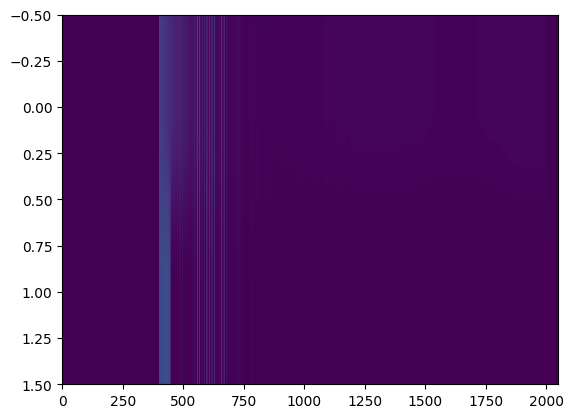

In [186]:
plt.imshow(d,aspect='auto')

(0.0, 100000000.0)

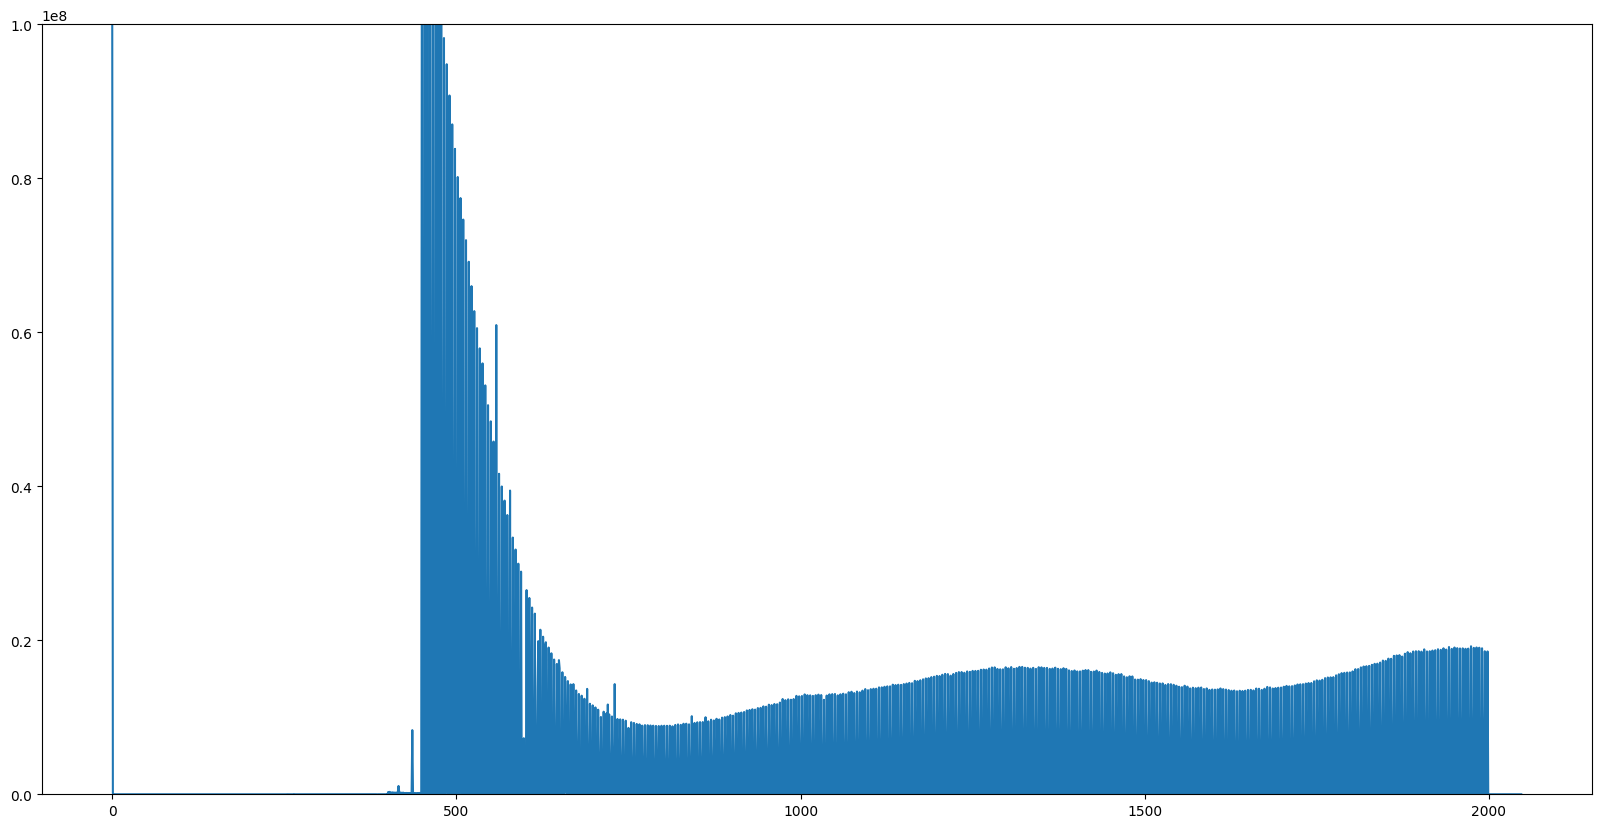

In [205]:
plt.figure(figsize=(20,10))
#
plt.plot(d[0]-d[1])
#plt.plot(d[1])
#plt.xlim(1000,2050)
plt.ylim(0,1e8)
#plt.semilogy()
